In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

    Ticker  Year  Stock Price  Revenue Growth  Gross Margin      ROA      ROE  \
0     AAPL  2014    24.580999           0.061       0.46206  0.21464  1.57413   
1     AAPL  2015    23.840199           0.061       0.46206  0.21464  1.57413   
2     AAPL  2016    26.815557           0.061       0.46206  0.21464  1.57413   
3     AAPL  2017    40.524345           0.061       0.46206  0.21464  1.57413   
4     AAPL  2018    37.665619           0.061       0.46206  0.21464  1.57413   
..     ...   ...          ...             ...           ...      ...      ...   
215   WDAY  2020   239.610001           0.167       0.75773  0.01426  0.21081   
216   WDAY  2021   273.179993           0.167       0.75773  0.01426  0.21081   
217   WDAY  2022   167.330002           0.167       0.75773  0.01426  0.21081   
218   WDAY  2023   268.279999           0.167       0.75773  0.01426  0.21081   
219   WDAY  2024   259.670013           0.167       0.75773  0.01426  0.21081   

     Debt-to-Equity  Curren

In [ ]:


# List of company ticker symbols
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA", "META", "AMD", "TSLA",
           "NFLX", "ADBE", "CRM", "SHOP", "PYPL", "NOW", "SQ", "ZM", "TWLO",
           "TEAM", "DOCU", "WDAY"]

# Define the years to collect data for (from 2014 to 2024)
years = list(range(2014, 2025))

# Initialize a DataFrame to store all data
all_data = pd.DataFrame()

# Loop through each ticker and each year, collecting data for each year individually
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Fetch 10 years of daily historical prices once
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)  # Remove timezone information
    
    for year in years:
        try:
            # Define the end of the year for each data point
            year_end = pd.Timestamp(f"{year}-12-31")
            
            # Get the closest available stock price on or before the year-end date
            nearest_idx = historical_prices.index.get_indexer([year_end], method="nearest")[0]
            stock_price = historical_prices["Close"].iloc[nearest_idx]

            # Collect financial information for each year
            info = stock.info
            row = {
                "Ticker": ticker,
                "Year": year,
                "Stock Price": stock_price,
                "Revenue Growth": info.get("revenueGrowth"),
                "Gross Margin": info.get("grossMargins"),
                "ROA": info.get("returnOnAssets"),
                "ROE": info.get("returnOnEquity"),
                "Debt-to-Equity": info.get("debtToEquity"),
                "Current Ratio": info.get("currentRatio"),
                "Quick Ratio": info.get("quickRatio")
            }
            
            # Append row to all_data DataFrame
            all_data = pd.concat([all_data, pd.DataFrame([row])], ignore_index=True)
        
        except KeyError as e:
            print(f"Data missing for {ticker} in {year}: {e}")

# Display final DataFrame with all annual metrics for each ticker
print(all_data)


In [2]:
print(all_data.tail())

    Ticker  Year  Stock Price  Revenue Growth  Gross Margin      ROA      ROE  \
215   WDAY  2020   239.610001           0.167       0.75773  0.01426  0.21081   
216   WDAY  2021   273.179993           0.167       0.75773  0.01426  0.21081   
217   WDAY  2022   167.330002           0.167       0.75773  0.01426  0.21081   
218   WDAY  2023   268.279999           0.167       0.75773  0.01426  0.21081   
219   WDAY  2024   259.670013           0.167       0.75773  0.01426  0.21081   

     Debt-to-Equity  Current Ratio  Quick Ratio  
215          40.312          2.039         1.93  
216          40.312          2.039         1.93  
217          40.312          2.039         1.93  
218          40.312          2.039         1.93  
219          40.312          2.039         1.93  


Do to limitation in yfinance changing the import process

In [3]:


# Group 1 tickers
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL"]

# Define years and quarters
years = list(range(2014, 2025))
quarters = ["03-31", "06-30", "09-30", "12-31"]

# Initialize DataFrame for Group 1
data_group_1 = pd.DataFrame()

# Loop through each ticker, year, and quarter
for ticker in tickers:
    stock = yf.Ticker(ticker)
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)

    for year in years:
        for quarter in quarters:
            quarter_end = pd.Timestamp(f"{year}-{quarter}")
            try:
                nearest_idx = historical_prices.index.get_indexer([quarter_end], method="nearest")[0]
                stock_price = historical_prices["Close"].iloc[nearest_idx]
                
                # Get financial info
                info = stock.info
                row = {
                    "Ticker": ticker,
                    "Year": year,
                    "Quarter End": quarter_end,
                    "Stock Price": stock_price,
                    "Revenue Growth": info.get("revenueGrowth"),
                    "Gross Margin": info.get("grossMargins"),
                    "ROA": info.get("returnOnAssets"),
                    "ROE": info.get("returnOnEquity"),
                    "Debt-to-Equity": info.get("debtToEquity"),
                    "Current Ratio": info.get("currentRatio"),
                    "Quick Ratio": info.get("quickRatio")
                }
                data_group_1 = pd.concat([data_group_1, pd.DataFrame([row])], ignore_index=True)
            except KeyError as e:
                print(f"Data missing for {ticker} in {quarter_end}: {e}")

print(data_group_1)


    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     AAPL  2014  2014-03-31    25.536354           0.061       0.46206   
1     AAPL  2014  2014-06-30    25.536354           0.061       0.46206   
2     AAPL  2014  2014-09-30    25.536354           0.061       0.46206   
3     AAPL  2014  2014-12-31    24.580999           0.061       0.46206   
4     AAPL  2015  2015-03-31    27.819216           0.061       0.46206   
..     ...   ...         ...          ...             ...           ...   
171  GOOGL  2023  2023-12-31   137.828705           0.151       0.58127   
172  GOOGL  2024  2024-03-31   155.105942           0.151       0.58127   
173  GOOGL  2024  2024-06-30   182.747513           0.151       0.58127   
174  GOOGL  2024  2024-09-30   165.850006           0.151       0.58127   
175  GOOGL  2024  2024-12-31   178.365005           0.151       0.58127   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0    0.21464  1.57413         2

In [4]:
# Group 2 tickers
tickers = ["NVDA", "META", "AMD", "TSLA"]

# Initialize DataFrame for Group 2
data_group_2 = pd.DataFrame()

# Loop through each ticker, year, and quarter
# Define years and quarters
years = list(range(2014, 2025))
quarters = ["03-31", "06-30", "09-30", "12-31"]

# Loop through each ticker, year, and quarter
for ticker in tickers:
    stock = yf.Ticker(ticker)
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)

    for year in years:
        for quarter in quarters:
            quarter_end = pd.Timestamp(f"{year}-{quarter}")
            try:
                nearest_idx = historical_prices.index.get_indexer([quarter_end], method="nearest")[0]
                stock_price = historical_prices["Close"].iloc[nearest_idx]
                
                # Get financial info
                info = stock.info
                row = {
                    "Ticker": ticker,
                    "Year": year,
                    "Quarter End": quarter_end,
                    "Stock Price": stock_price,
                    "Revenue Growth": info.get("revenueGrowth"),
                    "Gross Margin": info.get("grossMargins"),
                    "ROA": info.get("returnOnAssets"),
                    "ROE": info.get("returnOnEquity"),
                    "Debt-to-Equity": info.get("debtToEquity"),
                    "Current Ratio": info.get("currentRatio"),
                    "Quick Ratio": info.get("quickRatio")
                }
                data_group_2 = pd.concat([data_group_2, pd.DataFrame([row])], ignore_index=True)
            except KeyError as e:
                print(f"Data missing for {ticker} in {quarter_end}: {e}")

print(data_group_2)


    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     NVDA  2014  2014-03-31     0.480297           1.224       0.75976   
1     NVDA  2014  2014-06-30     0.480297           1.224       0.75976   
2     NVDA  2014  2014-09-30     0.480297           1.224       0.75976   
3     NVDA  2014  2014-12-31     0.481257           1.224       0.75976   
4     NVDA  2015  2015-03-31     0.504314           1.224       0.75976   
..     ...   ...         ...          ...             ...           ...   
171   TSLA  2023  2023-12-31   248.419998           0.078       0.18229   
172   TSLA  2024  2024-03-31   175.220001           0.078       0.18229   
173   TSLA  2024  2024-06-30   209.860001           0.078       0.18229   
174   TSLA  2024  2024-09-30   261.630005           0.078       0.18229   
175   TSLA  2024  2024-12-31   344.700012           0.078       0.18229   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0    0.55258  1.23767          

In [5]:
# Group 3 tickers
tickers = ["NFLX", "ADBE", "CRM", "SHOP"]

# Initialize DataFrame for Group 3
data_group_3 = pd.DataFrame()

# Loop through each ticker, year, and quarter
# Define years and quarters
years = list(range(2014, 2025))
quarters = ["03-31", "06-30", "09-30", "12-31"]

# Loop through each ticker, year, and quarter
for ticker in tickers:
    stock = yf.Ticker(ticker)
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)

    for year in years:
        for quarter in quarters:
            quarter_end = pd.Timestamp(f"{year}-{quarter}")
            try:
                nearest_idx = historical_prices.index.get_indexer([quarter_end], method="nearest")[0]
                stock_price = historical_prices["Close"].iloc[nearest_idx]
                
                # Get financial info
                info = stock.info
                row = {
                    "Ticker": ticker,
                    "Year": year,
                    "Quarter End": quarter_end,
                    "Stock Price": stock_price,
                    "Revenue Growth": info.get("revenueGrowth"),
                    "Gross Margin": info.get("grossMargins"),
                    "ROA": info.get("returnOnAssets"),
                    "ROE": info.get("returnOnEquity"),
                    "Debt-to-Equity": info.get("debtToEquity"),
                    "Current Ratio": info.get("currentRatio"),
                    "Quick Ratio": info.get("quickRatio")
                }
                data_group_3 = pd.concat([data_group_3, pd.DataFrame([row])], ignore_index=True)
            except KeyError as e:
                print(f"Data missing for {ticker} in {quarter_end}: {e}")

print(data_group_3)


    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     NFLX  2014  2014-03-31    51.871429           0.150       0.45251   
1     NFLX  2014  2014-06-30    51.871429           0.150       0.45251   
2     NFLX  2014  2014-09-30    51.871429           0.150       0.45251   
3     NFLX  2014  2014-12-31    48.801430           0.150       0.45251   
4     NFLX  2015  2015-03-31    59.527142           0.150       0.45251   
..     ...   ...         ...          ...             ...           ...   
171   SHOP  2023  2023-12-31    73.830002           0.261       0.50925   
172   SHOP  2024  2024-03-31    78.190002           0.261       0.50925   
173   SHOP  2024  2024-06-30    64.629997           0.261       0.50925   
174   SHOP  2024  2024-09-30    80.139999           0.261       0.50925   
175   SHOP  2024  2024-12-31   104.649498           0.261       0.50925   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0    0.11840  0.34714          

In [6]:
# Group 4 tickers
tickers = ["PYPL", "NOW", "SQ", "ZM"]

# Initialize DataFrame for Group 4
data_group_4 = pd.DataFrame()

# Loop through each ticker, year, and quarter
# Define years and quarters
years = list(range(2014, 2025))
quarters = ["03-31", "06-30", "09-30", "12-31"]

# Loop through each ticker, year, and quarter
for ticker in tickers:
    stock = yf.Ticker(ticker)
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)

    for year in years:
        for quarter in quarters:
            quarter_end = pd.Timestamp(f"{year}-{quarter}")
            try:
                nearest_idx = historical_prices.index.get_indexer([quarter_end], method="nearest")[0]
                stock_price = historical_prices["Close"].iloc[nearest_idx]
                
                # Get financial info
                info = stock.info
                row = {
                    "Ticker": ticker,
                    "Year": year,
                    "Quarter End": quarter_end,
                    "Stock Price": stock_price,
                    "Revenue Growth": info.get("revenueGrowth"),
                    "Gross Margin": info.get("grossMargins"),
                    "ROA": info.get("returnOnAssets"),
                    "ROE": info.get("returnOnEquity"),
                    "Debt-to-Equity": info.get("debtToEquity"),
                    "Current Ratio": info.get("currentRatio"),
                    "Quick Ratio": info.get("quickRatio")
                }
                data_group_4 = pd.concat([data_group_4, pd.DataFrame([row])], ignore_index=True)
            except KeyError as e:
                print(f"Data missing for {ticker} in {quarter_end}: {e}")

print(data_group_4)


    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     PYPL  2014  2014-03-31    36.709999           0.058       0.40096   
1     PYPL  2014  2014-06-30    36.709999           0.058       0.40096   
2     PYPL  2014  2014-09-30    36.709999           0.058       0.40096   
3     PYPL  2014  2014-12-31    36.709999           0.058       0.40096   
4     PYPL  2015  2015-03-31    36.709999           0.058       0.40096   
..     ...   ...         ...          ...             ...           ...   
171     ZM  2023  2023-12-31    69.150002           0.021       0.75895   
172     ZM  2024  2024-03-31    64.730003           0.021       0.75895   
173     ZM  2024  2024-06-30    59.209999           0.021       0.75895   
174     ZM  2024  2024-09-30    69.739998           0.021       0.75895   
175     ZM  2024  2024-12-31    77.940002           0.021       0.75895   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0    0.04343  0.22188          

In [7]:
# Group 5 tickers
tickers = ["TWLO", "TEAM", "DOCU", "WDAY"]

# Initialize DataFrame for Group 5
data_group_5 = pd.DataFrame()

# Loop through each ticker, year, and quarter
# Define years and quarters
years = list(range(2014, 2025))
quarters = ["03-31", "06-30", "09-30", "12-31"]

# Loop through each ticker, year, and quarter
for ticker in tickers:
    stock = yf.Ticker(ticker)
    historical_prices = stock.history(period="10y", interval="1d")
    historical_prices.index = historical_prices.index.tz_localize(None)

    for year in years:
        for quarter in quarters:
            quarter_end = pd.Timestamp(f"{year}-{quarter}")
            try:
                nearest_idx = historical_prices.index.get_indexer([quarter_end], method="nearest")[0]
                stock_price = historical_prices["Close"].iloc[nearest_idx]
                
                # Get financial info
                info = stock.info
                row = {
                    "Ticker": ticker,
                    "Year": year,
                    "Quarter End": quarter_end,
                    "Stock Price": stock_price,
                    "Revenue Growth": info.get("revenueGrowth"),
                    "Gross Margin": info.get("grossMargins"),
                    "ROA": info.get("returnOnAssets"),
                    "ROE": info.get("returnOnEquity"),
                    "Debt-to-Equity": info.get("debtToEquity"),
                    "Current Ratio": info.get("currentRatio"),
                    "Quick Ratio": info.get("quickRatio")
                }
                data_group_5 = pd.concat([data_group_5, pd.DataFrame([row])], ignore_index=True)
            except KeyError as e:
                print(f"Data missing for {ticker} in {quarter_end}: {e}")

print(data_group_5)

    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     TWLO  2014  2014-03-31    28.790001           0.097       0.50940   
1     TWLO  2014  2014-06-30    28.790001           0.097       0.50940   
2     TWLO  2014  2014-09-30    28.790001           0.097       0.50940   
3     TWLO  2014  2014-12-31    28.790001           0.097       0.50940   
4     TWLO  2015  2015-03-31    28.790001           0.097       0.50940   
..     ...   ...         ...          ...             ...           ...   
171   WDAY  2023  2023-12-31   268.279999           0.167       0.75773   
172   WDAY  2024  2024-03-31   272.440002           0.167       0.75773   
173   WDAY  2024  2024-06-30   224.720001           0.167       0.75773   
174   WDAY  2024  2024-09-30   244.410004           0.167       0.75773   
175   WDAY  2024  2024-12-31   259.929993           0.167       0.75773   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0   -0.00594 -0.05078          

Combine the 5 data frames

In [8]:
# Combine all groups into a single DataFrame
all_data = pd.concat([data_group_1, data_group_2, data_group_3, data_group_4, data_group_5], ignore_index=True)

# Display the combined DataFrame
print(all_data)


    Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0     AAPL  2014  2014-03-31    25.536354           0.061       0.46206   
1     AAPL  2014  2014-06-30    25.536354           0.061       0.46206   
2     AAPL  2014  2014-09-30    25.536354           0.061       0.46206   
3     AAPL  2014  2014-12-31    24.580999           0.061       0.46206   
4     AAPL  2015  2015-03-31    27.819216           0.061       0.46206   
..     ...   ...         ...          ...             ...           ...   
875   WDAY  2023  2023-12-31   268.279999           0.167       0.75773   
876   WDAY  2024  2024-03-31   272.440002           0.167       0.75773   
877   WDAY  2024  2024-06-30   224.720001           0.167       0.75773   
878   WDAY  2024  2024-09-30   244.410004           0.167       0.75773   
879   WDAY  2024  2024-12-31   259.929993           0.167       0.75773   

         ROA      ROE  Debt-to-Equity  Current Ratio  Quick Ratio  
0    0.21464  1.57413         2

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ticker          880 non-null    object        
 1   Year            880 non-null    int64         
 2   Quarter End     880 non-null    datetime64[ns]
 3   Stock Price     880 non-null    float64       
 4   Revenue Growth  880 non-null    float64       
 5   Gross Margin    880 non-null    float64       
 6   ROA             880 non-null    float64       
 7   ROE             880 non-null    float64       
 8   Debt-to-Equity  880 non-null    float64       
 9   Current Ratio   880 non-null    float64       
 10  Quick Ratio     880 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 75.8+ KB
None

Missing Values:
 Ticker            0
Year              0
Quarter End       0
Stock Price       0
Revenue Growth  

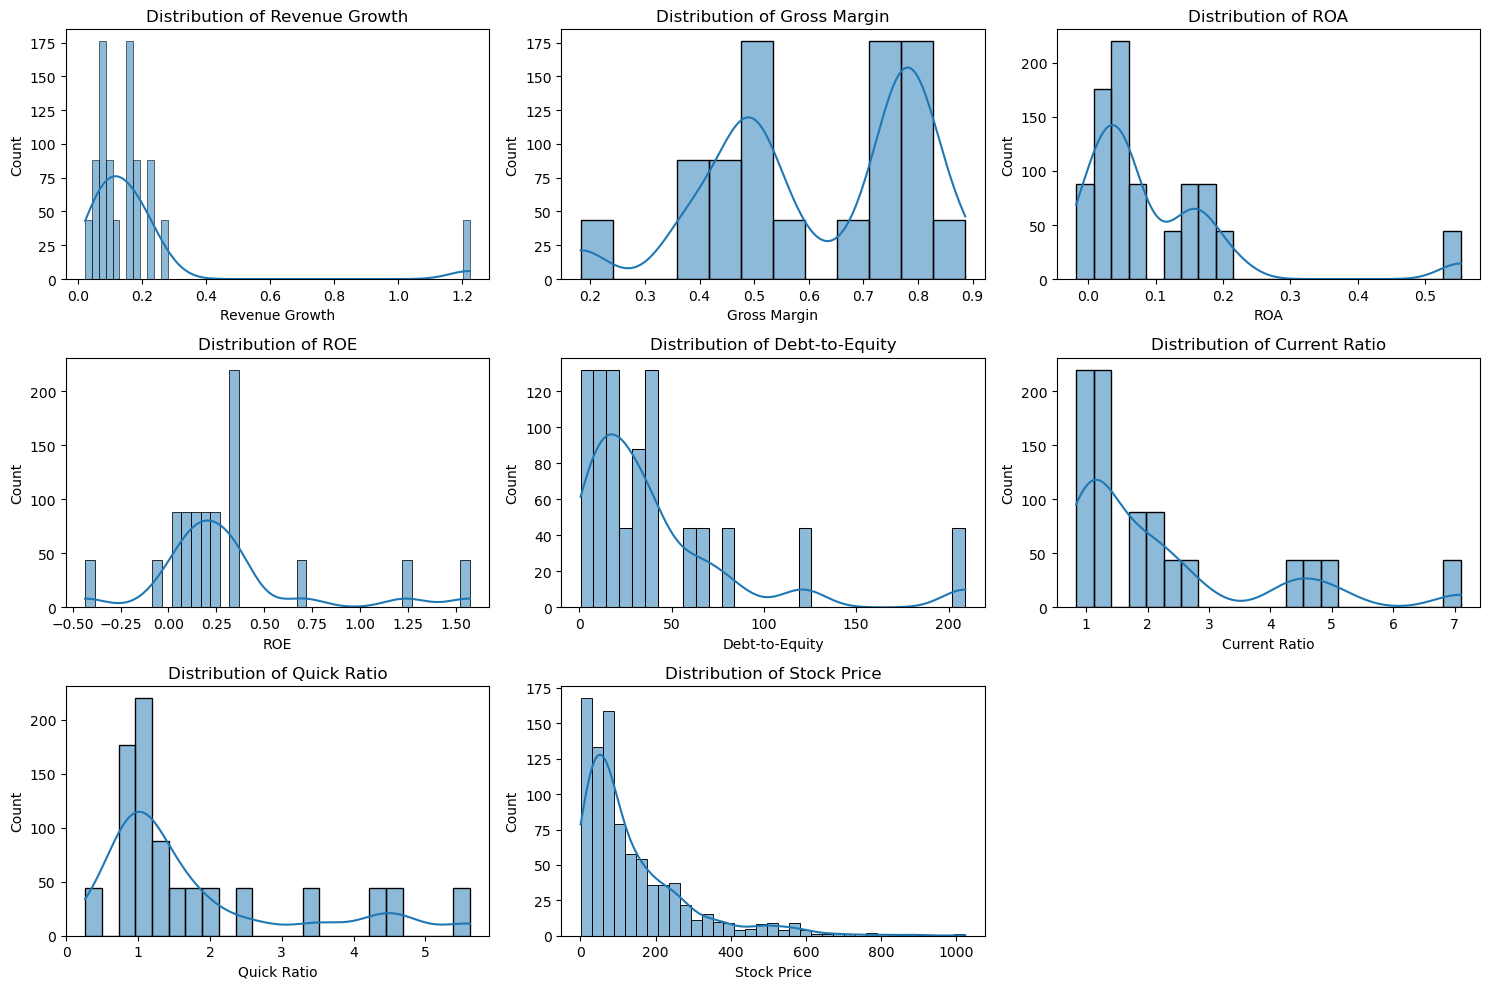

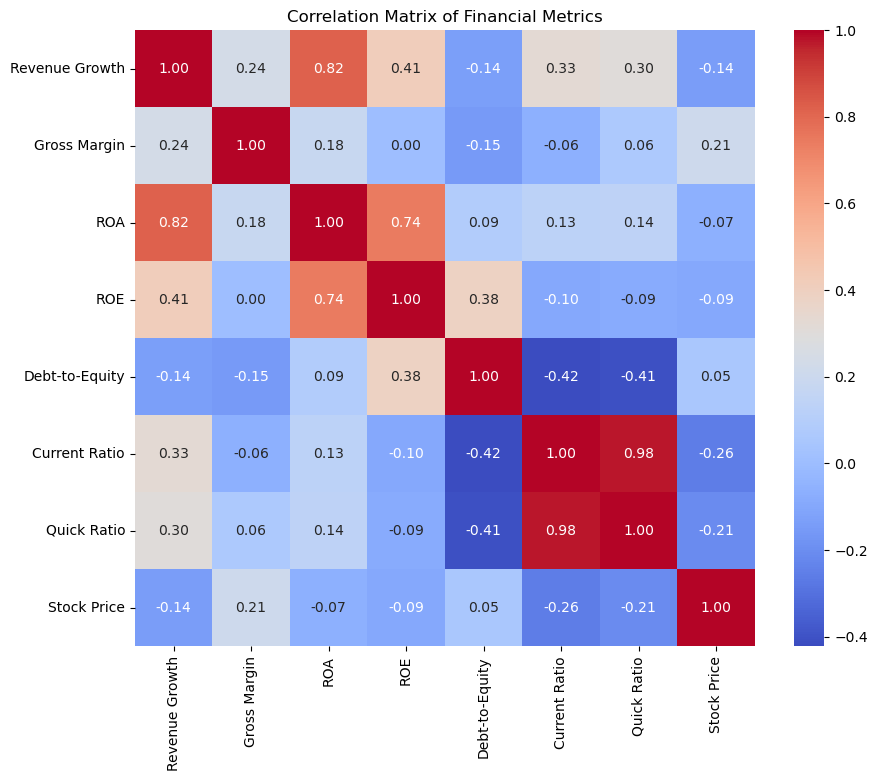

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Basic Information
print("Basic Information")
print(all_data.info())
print("\nMissing Values:\n", all_data.isnull().sum())

# Step 2: Descriptive Statistics
print("\nDescriptive Statistics:\n", all_data.describe())

# Step 3: Data Distributions
metrics_to_plot = ["Revenue Growth", "Gross Margin", "ROA", "ROE", "Debt-to-Equity", "Current Ratio", "Quick Ratio", "Stock Price"]

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(all_data[metric].dropna(), kde=True)
    plt.title(f"Distribution of {metric}")
plt.tight_layout()
plt.show()

# Step 4: Correlation Matrix
correlation_matrix = all_data[metrics_to_plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


In [10]:
# Combine all groups into a single DataFrame
all_data = pd.concat([data_group_1, data_group_2, data_group_3, data_group_4, data_group_5], ignore_index=True)

# Save the combined DataFrame to a CSV file
all_data.to_csv("combined_financial_data.csv", index=False)

print("Data has been saved to combined_financial_data.csv")

Data has been saved to combined_financial_data.csv


1. Lagged and Rolling Features
Approach:

Lagged Values: For each stock or financial metric (e.g., price, volume), create lagged versions of the data, such as the previous quarter, two quarters ago, etc. This can be done using Pandas’ shift() function. For example:
python
Copy code
data['price_lag_1'] = data['price'].shift(1)
data['price_lag_2'] = data['price'].shift(2)
Rolling Averages: Use rolling windows to calculate the average over different periods (e.g., 3-month, 6-month). This can be implemented using the rolling() function in Pandas:
python
Copy code
data['price_3_month_avg'] = data['price'].rolling(window=3).mean()
data['price_6_month_avg'] = data['price'].rolling(window=6).mean()
Rolling Standard Deviation: To capture volatility, calculate rolling standard deviations:
python
Copy code
data['price_3_month_std'] = data['price'].rolling(window=3).std()
Benefits:

Lagged values help capture the trend from recent quarters, while rolling averages and standard deviations capture smoothed trends and volatility, respectively, helping the model understand stability and fluctuations.
2. Quarter-over-Quarter Changes
Approach:

Percentage Change: Calculate the quarter-over-quarter percentage change in stock price and other financial metrics to capture growth or decline patterns. This can be done using the pct_change() function:
python
Copy code
data['price_qoq_change'] = data['price'].pct_change(periods=1)
Rate of Change: For metrics like revenue or profit, calculate their rate of change using a similar method. You can also use rolling percentage changes to get the growth rate over a few quarters:
python
Copy code
data['revenue_qoq_change'] = data['revenue'].pct_change(periods=1)
Acceleration of Growth: To measure if growth is accelerating, compute the difference between quarterly percentage changes:
python
Copy code
data['acceleration_growth'] = data['revenue_qoq_change'].diff()
Benefits:

These features capture momentum and shifts in growth rates, which can be predictive of future performance if there’s a consistent pattern.
3. Seasonality Adjustments
Approach:

Quarter Indicator: Create a categorical variable that represents the quarter (e.g., Q1, Q2, Q3, Q4). In Pandas, you can derive the quarter directly from a datetime column:
python
Copy code
data['quarter'] = data['date'].dt.quarter
Year-over-Year Comparison: Compare the same quarter across years to account for seasonal trends. For example, calculate the year-over-year percentage change in the stock price:
python
Copy code
data['price_yoy_change'] = data['price'].pct_change(periods=4)  # 4 quarters back
Benefits:

Seasonal adjustments help account for patterns that might repeat each year, providing the model with context for expected changes in a given quarter.
5. Financial Ratios and Metrics
Approach:

Profitability Ratios: Ratios like gross margin and net profit margin can help understand the company’s financial health. For example:
python
Copy code
data['gross_margin'] = data['gross_profit'] / data['revenue']
data['net_profit_margin'] = data['net_income'] / data['revenue']
Liquidity Ratios: Calculate the current ratio and quick ratio to assess liquidity:
python
Copy code
data['current_ratio'] = data['current_assets'] / data['current_liabilities']
data['quick_ratio'] = (data['current_assets'] - data['inventory']) / data['current_liabilities']
Debt Ratios: The debt-to-equity ratio and interest coverage ratio can reveal financial stability:
python
Copy code
data['debt_to_equity'] = data['total_liabilities'] / data['shareholders_equity']
data['interest_coverage'] = data['ebit'] / data['interest_expense']


## 1. Lagged and Rolling features 

In [11]:
# Revenue Growth and Stock Price
all_data['revenue_growth_lag_1'] = all_data['Revenue Growth'].shift(1)
all_data['stock_price_lag_1'] = all_data['Stock Price'].shift(1)


Smooth out fluctuations using rolling averages for gross margin and stock price:



In [12]:
all_data['gross_margin_rolling_mean'] = all_data['Gross Margin'].rolling(window=3).mean()
all_data['stock_price_rolling_mean'] = all_data['Stock Price'].rolling(window=3).mean()


Capture volatility with rolling standard deviations:


In [13]:
all_data['stock_price_rolling_std'] = all_data['Stock Price'].rolling(window=3).std()


## 2. Quarter-over-Quarter and Year-over-Year Changes


In [14]:
# Highlight short-term trends in financial growth:
all_data['revenue_growth_qoq'] = all_data['Revenue Growth'].pct_change(periods=1)


In [15]:
# Measure long-term changes and seasonality:
all_data['revenue_growth_yoy'] = all_data['Revenue Growth'].pct_change(periods=4)
all_data['stock_price_yoy'] = all_data['Stock Price'].pct_change(periods=4)


In [16]:
# Quantify the change in growth rate (second derivative):
all_data['revenue_growth_acceleration'] = all_data['revenue_growth_qoq'].diff(periods=1)

## 3. Derived Ratios


In [17]:
# Profitability Ratios:
#Derive metrics for financial health:

all_data['profit_margin'] = all_data['Gross Margin'] / all_data['Revenue Growth']
#Liquidity Ratios:
#Assess financial stability:

all_data['liquidity_ratio'] = all_data['Current Ratio'] / all_data['Debt-to-Equity']

#Debt Ratios:
#Focus on leverage and solvency:

all_data['debt_to_asset'] = all_data['Debt-to-Equity'] * all_data['ROA']


## 4. Interaction Features


In [18]:
# Capture compounding effects of related features:

all_data['roa_roe_interaction'] = all_data['ROA'] * all_data['ROE']
all_data['debt_to_equity_roa'] = all_data['Debt-to-Equity'] * all_data['ROA']


## 5. Seasonality Adjustments


In [19]:
#Quarter Indicator:
#Encode the seasonal cycle for analysis:

all_data['quarter'] = pd.DatetimeIndex(all_data['Quarter End']).quarter
#Year-over-Year Seasonal Trends:
#Measure seasonal patterns over years:

all_data['revenue_yoy_seasonality'] = all_data['Revenue Growth'].pct_change(periods=4)


In [20]:
#Handling Missing Values
#Imputation:
#Replace missing data with appropriate strategies:

all_data['Debt-to-Equity'].fillna(all_data['Debt-to-Equity'].median(), inplace=True)
all_data['Current Ratio'].fillna(method='ffill', inplace=True)

/var/folders/j7/8vszhh3j4zq6cvb_zv521x8c0000gn/T/ipykernel_19767/2823910287.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['Debt-to-Equity'].fillna(all_data['Debt-to-Equity'].median(), inplace=True)
/var/folders/j7/8vszhh3j4zq6cvb_zv521x8c0000gn/T/ipykernel_19767/2823910287.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

Key Features Correlated with Stock Price:
 Stock Price      1.000000
Gross Margin     0.209386
Quick Ratio     -0.206378
Current Ratio   -0.255982
Name: Stock Price, dtype: float64


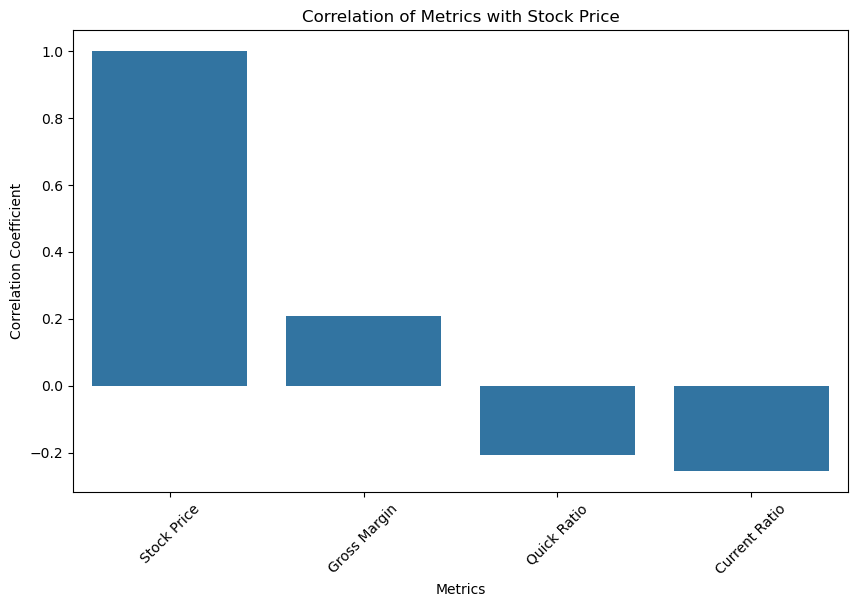

Selected Features for Modeling: ['Stock Price', 'Gross Margin', 'Quick Ratio', 'Current Ratio']


In [21]:


# Assuming all_data is your DataFrame
metrics = ["Revenue Growth", "Gross Margin", "ROA", "ROE", 
           "Debt-to-Equity", "Current Ratio", "Quick Ratio", "Stock Price"]

# Step 1: Compute Correlation Matrix
correlation_matrix = all_data[metrics].corr()

# Step 2: Select Features Correlated with Stock Price
correlation_with_target = correlation_matrix["Stock Price"].sort_values(ascending=False)

# Filter metrics with high correlation (e.g., threshold |r| > 0.2)
key_features = correlation_with_target[correlation_with_target.abs() > 0.2]
print("Key Features Correlated with Stock Price:\n", key_features)

# Step 3: Visualize Correlations with Target Variable
plt.figure(figsize=(10, 6))
sns.barplot(x=key_features.index, y=key_features.values)
plt.title("Correlation of Metrics with Stock Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.show()

# Select Key Features for Modeling
selected_features = key_features.index.tolist()
print("Selected Features for Modeling:", selected_features)


## Review combined data set

In [22]:
# Quick check of the combined dataset
print("Dataset shape:", all_data.shape)
print("First few rows of the dataset:\n", all_data.head())
print("Summary of dataset:\n", all_data.describe())

Dataset shape: (880, 27)
First few rows of the dataset:
   Ticker  Year Quarter End  Stock Price  Revenue Growth  Gross Margin  \
0   AAPL  2014  2014-03-31    25.536354           0.061       0.46206   
1   AAPL  2014  2014-06-30    25.536354           0.061       0.46206   
2   AAPL  2014  2014-09-30    25.536354           0.061       0.46206   
3   AAPL  2014  2014-12-31    24.580999           0.061       0.46206   
4   AAPL  2015  2015-03-31    27.819216           0.061       0.46206   

       ROA      ROE  Debt-to-Equity  Current Ratio  ...  revenue_growth_yoy  \
0  0.21464  1.57413         209.059          0.867  ...                 NaN   
1  0.21464  1.57413         209.059          0.867  ...                 NaN   
2  0.21464  1.57413         209.059          0.867  ...                 NaN   
3  0.21464  1.57413         209.059          0.867  ...                 NaN   
4  0.21464  1.57413         209.059          0.867  ...                 0.0   

   stock_price_yoy  revenue_g

In [23]:
# Check for missing values
missing_values = all_data.isnull().sum()
print("Missing values per column:\n", missing_values)



Missing values per column:
 Ticker                         0
Year                           0
Quarter End                    0
Stock Price                    0
Revenue Growth                 0
Gross Margin                   0
ROA                            0
ROE                            0
Debt-to-Equity                 0
Current Ratio                  0
Quick Ratio                    0
revenue_growth_lag_1           1
stock_price_lag_1              1
gross_margin_rolling_mean      2
stock_price_rolling_mean       2
stock_price_rolling_std        2
revenue_growth_qoq             1
revenue_growth_yoy             4
stock_price_yoy                4
revenue_growth_acceleration    2
profit_margin                  0
liquidity_ratio                0
debt_to_asset                  0
roa_roe_interaction            0
debt_to_equity_roa             0
quarter                        0
revenue_yoy_seasonality        4
dtype: int64


/var/folders/j7/8vszhh3j4zq6cvb_zv521x8c0000gn/T/ipykernel_19767/4228667274.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data[col] = all_data[col].fillna(method='ffill')  # Forward fill
/var/folders/j7/8vszhh3j4zq6cvb_zv521x8c0000gn/T/ipykernel_19767/4228667274.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data[col] = all_data[col].fillna(method='bfill')  # Backward fill as fallback



Remaining Missing Values per Column After Handling:
 Ticker                         0
Year                           0
Quarter End                    0
Stock Price                    0
Revenue Growth                 0
Gross Margin                   0
ROA                            0
ROE                            0
Debt-to-Equity                 0
Current Ratio                  0
Quick Ratio                    0
revenue_growth_lag_1           1
stock_price_lag_1              0
gross_margin_rolling_mean      2
stock_price_rolling_mean       0
stock_price_rolling_std        0
revenue_growth_qoq             1
revenue_growth_yoy             4
stock_price_yoy                0
revenue_growth_acceleration    2
profit_margin                  0
liquidity_ratio                0
debt_to_asset                  0
roa_roe_interaction            0
debt_to_equity_roa             0
quarter                        0
revenue_yoy_seasonality        0
dtype: int64


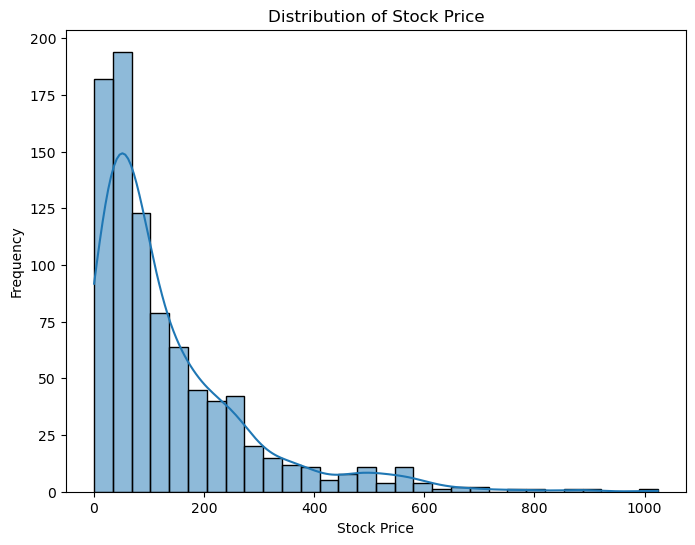

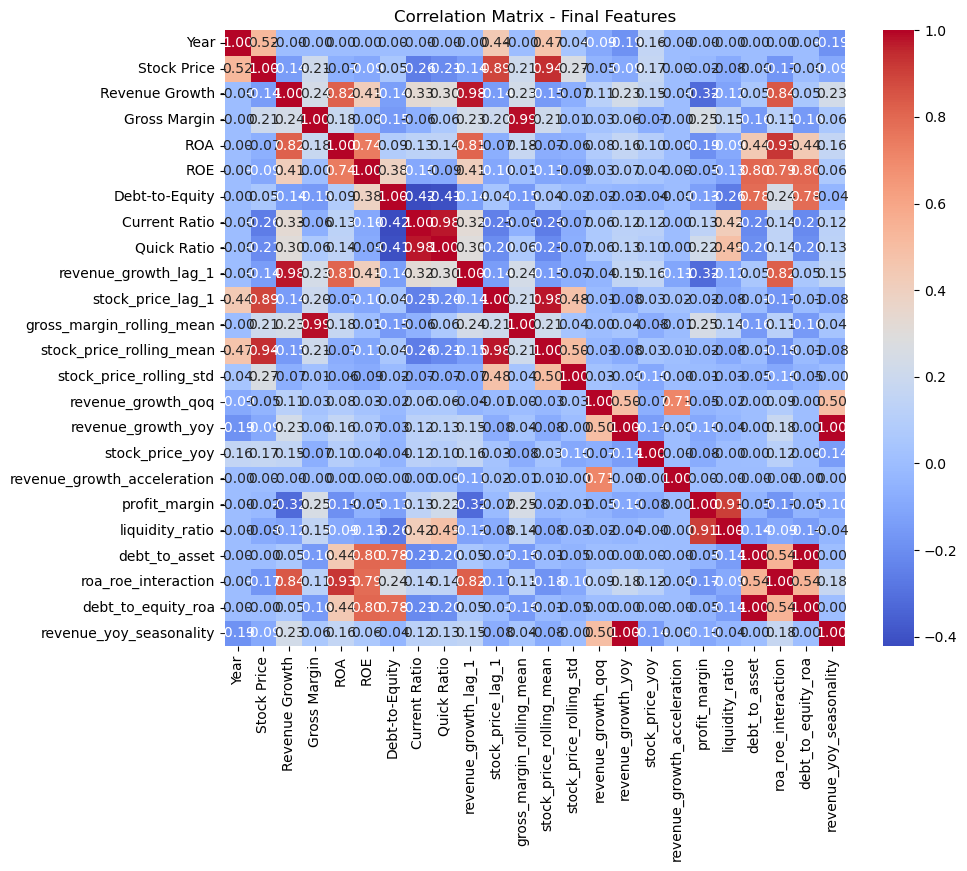

In [24]:
# Step 1: Handle Missing Data
# Forward and Backward Fill for Sequential Data
sequential_columns = ['stock_price_lag_1', 'stock_price_rolling_mean', 'stock_price_rolling_std', 
                      'stock_price_yoy', 'revenue_yoy_seasonality']

for col in sequential_columns:
    all_data[col] = all_data[col].fillna(method='ffill')  # Forward fill
    all_data[col] = all_data[col].fillna(method='bfill')  # Backward fill as fallback

# Step 2: Mean/Median Imputation for Remaining Missing Values
# Replace with column mean or median
for col in sequential_columns:
    if all_data[col].isnull().sum() > 0:  # Check if still missing
        all_data[col] = all_data[col].fillna(all_data[col].mean())  # Impute with mean

# Step 3: Verify Missing Data
print("\nRemaining Missing Values per Column After Handling:\n", all_data.isnull().sum())

# Step 4: Proceed with EDA
# Visualize the distribution of stock price
plt.figure(figsize=(8, 6))
sns.histplot(all_data['Stock Price'], kde=True, bins=30)
plt.title("Distribution of Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix for numerical columns
numeric_columns = all_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(all_data[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Final Features")
plt.show()


In [33]:

##Data Prep for modeling

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np

# Data Preparation Function
def prepare_data(data, target_column):
    """
    Prepares the data by handling non-numeric columns, missing values, datetime columns, and splitting into train/test sets.

    Args:
    - data (pd.DataFrame): The input dataset.
    - target_column (str): The name of the target variable.

    Returns:
    - X_train, X_test, y_train, y_test: Train/test splits of the features and target variable.
    """
    # Step 1: Label Encode Categorical Columns (e.g., 'Ticker')
    if 'Ticker' in data.columns:
        label_encoder = LabelEncoder()
        data['Ticker'] = label_encoder.fit_transform(data['Ticker'])

    # Step 2: Handle Datetime Columns
    datetime_columns = data.select_dtypes(include=['datetime64']).columns
    if len(datetime_columns) > 0:
        print("Processing datetime columns:", datetime_columns)
        for col in datetime_columns:
            # Extract useful features from datetime
            data[col + '_year'] = data[col].dt.year
            data[col + '_month'] = data[col].dt.month
            data[col + '_day'] = data[col].dt.day
            data[col + '_quarter'] = data[col].dt.quarter
            
            # Drop the original datetime column
            data = data.drop(columns=[col])

    # Step 3: Drop Non-Numeric Columns
    non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
    if len(non_numeric_columns) > 0:
        print("Dropping non-numeric columns:", non_numeric_columns)
        data = data.drop(columns=non_numeric_columns)

    # Step 4: Handle Missing Values (Impute with Mean)
    data = data.fillna(data.mean())

    # Step 5: Replace Infinite Values
    data = data.replace([np.inf, -np.inf], np.nan).fillna(data.mean())

    # Step 6: Separate Features and Target
    features = data.drop(columns=[target_column])  # Features
    target = data[target_column]  # Target variable

    # Step 7: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    print("Data Preparation Complete!")
    print("Training feature shape:", X_train.shape)
    print("Testing feature shape:", X_test.shape)
    print("Training target shape:", y_train.shape)
    print("Testing target shape:", y_test.shape)

    return X_train, X_test, y_train, y_test





# RandomForestClassifier 

In [34]:


# Step 1: Bin the target variable into categories
def categorize_target(data, target_column, bins, labels):
    """
    Categorize the continuous target into discrete bins.
    
    Args:
    - data (pd.DataFrame): The dataset containing the target column.
    - target_column (str): The name of the target column.
    - bins (list): Bin edges for categorization.
    - labels (list): Labels for the bins.

    Returns:
    - pd.Series: Categorical target variable.
    """
    return pd.cut(data[target_column], bins=bins, labels=labels)

# Define bins and labels for the target
bins = [0, 100, 200, np.inf]  # Adjust based on your data distribution
labels = ['low', 'medium', 'high']

# Categorize the target
all_data['Target Category'] = categorize_target(all_data, 'Stock Price', bins=bins, labels=labels)

# Step 2: Define the Target and Features
target_column = 'Target Category'  # Updated target column for classification
features = all_data.drop(columns=['Stock Price', target_column])  # Drop original target and new target from features
target = all_data[target_column]  # Extract the categorized target variable

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Custom Transformer for Data Preparation
class DataPreprocessor(BaseEstimator, TransformerMixin):
    """
    Custom transformer to preprocess data:
    - Handle missing values
    - Encode categorical columns
    - Extract features from datetime columns
    """
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        # Fit label encoders for categorical columns
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original data

        # Encode categorical columns
        for col, le in self.label_encoders.items():
            X[col] = le.transform(X[col])

        # Extract features from datetime columns
        datetime_columns = X.select_dtypes(include=['datetime64']).columns
        for col in datetime_columns:
            X[col + '_year'] = X[col].dt.year
            X[col + '_month'] = X[col].dt.month
            X[col + '_day'] = X[col].dt.day
            X[col + '_quarter'] = X[col].dt.quarter
            X = X.drop(columns=[col])  # Drop original datetime column

        # Handle missing and infinite values
        X = X.fillna(X.mean())
        X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())

        return X

# Step 5: Define the Model Pipeline
data_preprocessor = DataPreprocessor()

rf_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'model__max_depth': [3, 5, 10],
    'model__n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Evaluate the RandomForestClassifier Pipeline
rf_best_model = grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

print("\nRandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters from Grid Search: {'model__max_depth': 5, 'model__n_estimators': 200}

RandomForestClassifier Accuracy: 0.9147727272727273

Classification Report:
               precision    recall  f1-score   support

        high       0.90      0.92      0.91        38
         low       0.97      0.95      0.96        99
      medium       0.80      0.82      0.81        39

    accuracy                           0.91       176
   macro avg       0.89      0.90      0.89       176
weighted avg       0.92      0.91      0.92       176



# Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Gradient Boosting Accuracy:", grid_search_gb.best_score_)


Best Parameters for Gradient Boosting: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200}
Gradient Boosting Accuracy: 0.9417325227963527


# XGBoost Classifier

In [36]:
from xgboost import XGBClassifier


# Encode the target labels (y_train and y_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert 'low', 'medium', 'high' to integers
y_test_encoded = label_encoder.transform(y_test)  # Apply the same transformation to y_test

# Define the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(eval_metric='mlogloss', random_state=42))  # Removed 'use_label_encoder'
])

# Define the hyperparameter grid for XGBoost
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5)
grid_search_xgb.fit(X_train, y_train_encoded)

# Get the best parameters and evaluate
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("XGBoost Accuracy:", grid_search_xgb.best_score_)

# Evaluate the model on the test set
xgb_best_model = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)

# Decode predictions back to original labels for interpretability
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("\nDecoded Predictions:", y_pred_xgb_decoded)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_decoded))



Best Parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
XGBoost Accuracy: 0.9530901722391084

Decoded Predictions: ['low' 'high' 'medium' 'low' 'low' 'low' 'medium' 'medium' 'low' 'medium'
 'high' 'low' 'high' 'low' 'high' 'low' 'low' 'low' 'low' 'low' 'low'
 'high' 'medium' 'medium' 'low' 'medium' 'low' 'high' 'low' 'medium'
 'medium' 'low' 'high' 'high' 'low' 'low' 'low' 'high' 'low' 'low' 'low'
 'medium' 'low' 'medium' 'low' 'low' 'high' 'low' 'low' 'medium' 'low'
 'low' 'low' 'high' 'high' 'low' 'low' 'medium' 'low' 'low' 'low' 'high'
 'medium' 'low' 'low' 'low' 'low' 'high' 'medium' 'low' 'low' 'high' 'low'
 'low' 'low' 'high' 'high' 'medium' 'low' 'low' 'medium' 'high' 'low'
 'low' 'low' 'low' 'low' 'low' 'high' 'high' 'medium' 'low' 'low' 'low'
 'low' 'low' 'medium' 'high' 'low' 'high' 'medium' 'low' 'low' 'high'
 'medium' 'low' 'high' 'low' 'high' 'low' 'low' 'medium' 'low' 'medium'
 'low' 'medium' 'high' 'low' 'medium' 'low

# Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("SVM Accuracy:", grid_search_svm.best_score_)


Best Parameters for SVM: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}
SVM Accuracy: 0.9090780141843972


# K-Nearest Neighbors (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("KNN Accuracy:", grid_search_knn.best_score_)


Best Parameters for KNN: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'distance'}
KNN Accuracy: 0.8323809523809524


## Compare models


Classification Report for Random Forest:
               precision    recall  f1-score   support

        high       0.90      0.92      0.91        38
         low       0.97      0.95      0.96        99
      medium       0.80      0.82      0.81        39

    accuracy                           0.91       176
   macro avg       0.89      0.90      0.89       176
weighted avg       0.92      0.91      0.92       176


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

        high       0.92      0.92      0.92        38
         low       0.99      0.97      0.98        99
      medium       0.85      0.90      0.88        39

    accuracy                           0.94       176
   macro avg       0.92      0.93      0.93       176
weighted avg       0.94      0.94      0.94       176


Classification Report for XGBoost:
               precision    recall  f1-score   support

        high       0.92      0.95      0.94        38
  

/var/folders/j7/8vszhh3j4zq6cvb_zv521x8c0000gn/T/ipykernel_19767/3694377714.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y="Accuracy", palette="coolwarm")


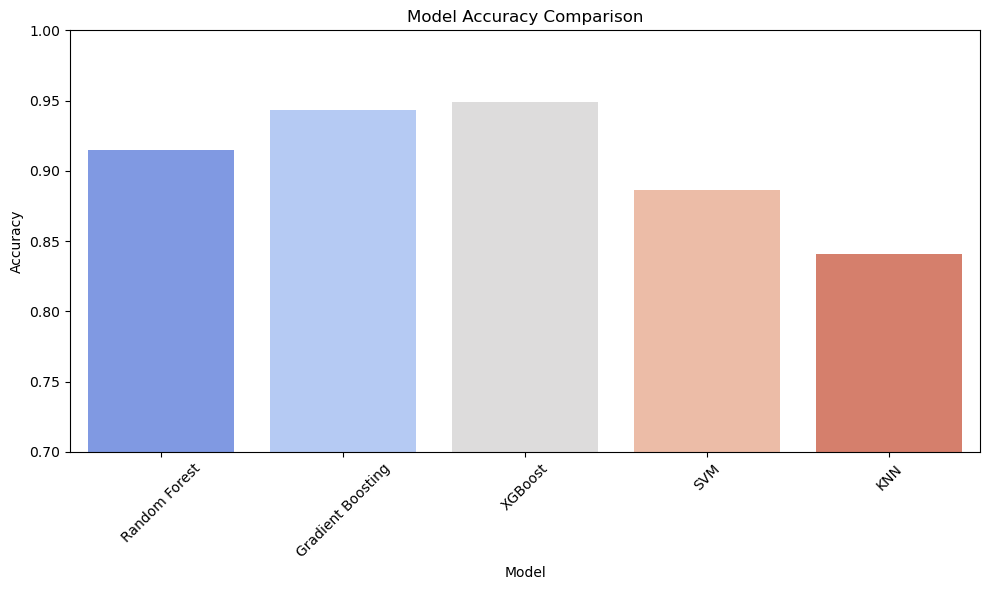

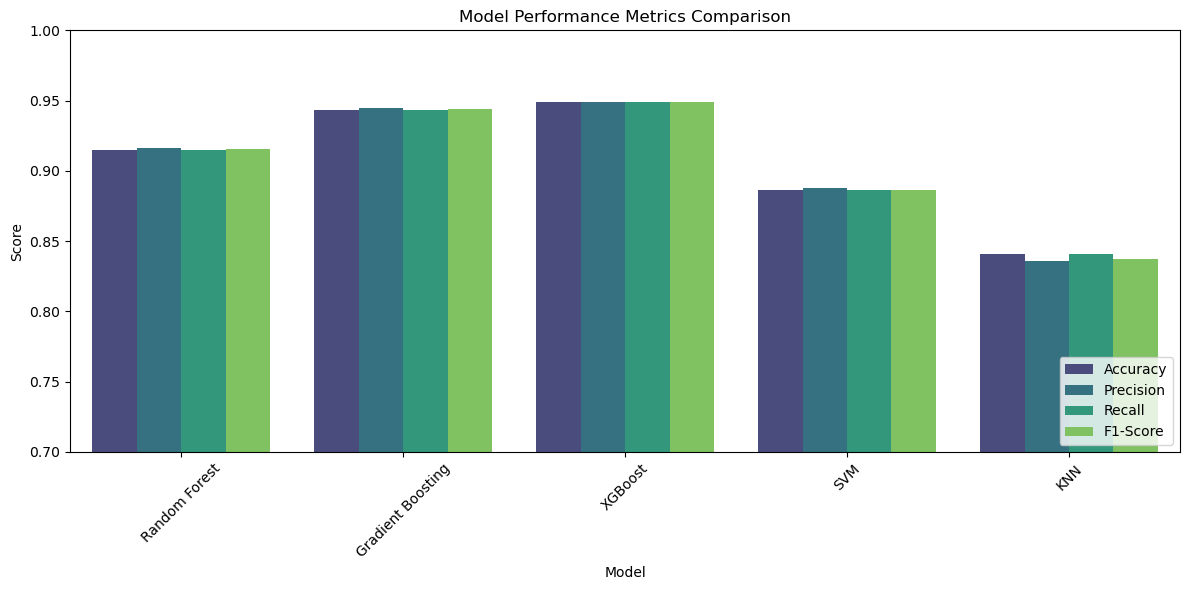

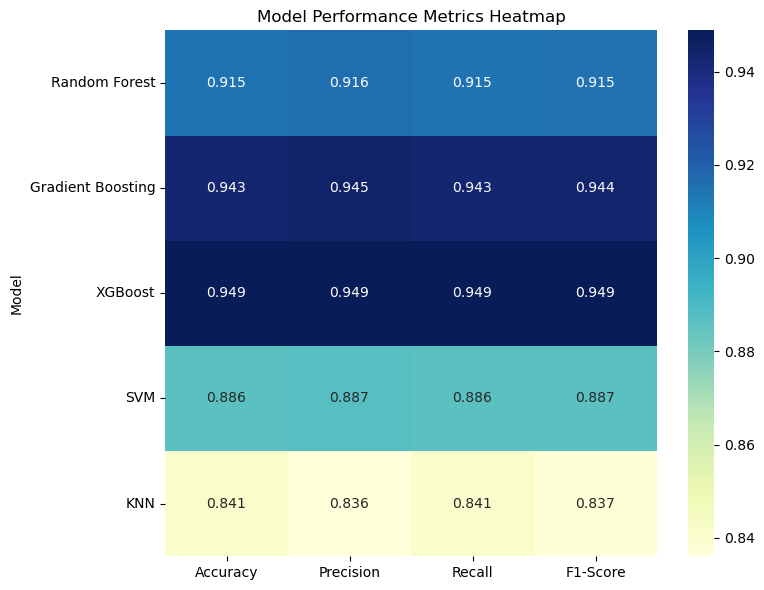

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import seaborn as sns
import matplotlib.pyplot as plt


def encode_labels(y, label_encoder):
    """
    Ensures the input labels are encoded consistently.

    Args:
    - y (pd.Series or np.ndarray): Labels to encode.
    - label_encoder: Fitted LabelEncoder instance.

    Returns:
    - Encoded labels as np.ndarray.
    """
    if isinstance(y.iloc[0], str):  # Check if labels are strings
        return label_encoder.transform(y)  # Encode to integers
    return y


def evaluate_model(name, model, X_test, y_test_encoded, label_encoder, model_performance):
    """
    Evaluate a single model and update the model performance dictionary.

    Args:
    - name (str): Name of the model.
    - model: Trained model instance.
    - X_test: Test features.
    - y_test_encoded: Encoded test labels.
    - label_encoder: Fitted LabelEncoder instance.
    - model_performance: Dictionary to store performance metrics.

    Returns:
    - Updated model_performance dictionary.
    """
    try:
        y_pred = model.predict(X_test)

        # Ensure predictions are encoded
        y_pred_encoded = encode_labels(pd.Series(y_pred), label_encoder)

        # Collect performance metrics
        model_performance["Model"].append(name)
        model_performance["Accuracy"].append(accuracy_score(y_test_encoded, y_pred_encoded))
        model_performance["Precision"].append(precision_score(y_test_encoded, y_pred_encoded, average="weighted"))
        model_performance["Recall"].append(recall_score(y_test_encoded, y_pred_encoded, average="weighted"))
        model_performance["F1-Score"].append(f1_score(y_test_encoded, y_pred_encoded, average="weighted"))

        # Decode for human-readable classification report
        y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
        y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)
        print(f"\nClassification Report for {name}:\n", classification_report(y_test_decoded, y_pred_decoded))

    except Exception as e:
        print(f"Error evaluating {name}: {e}")

    return model_performance


# Step 1: Data Preparation
target_column = "Target Category"  # Encoded target variable
features = all_data.drop(columns=[target_column, "Stock Price"])  # Ensure 'Stock Price' is excluded
target = all_data[target_column]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Encode labels
y_test_encoded = encode_labels(y_test, label_encoder)

# Initialize performance dictionary
model_performance = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
}

# Evaluate Random Forest
rf_best_model = grid_search.best_estimator_  # Best model from Random Forest Grid Search
model_performance = evaluate_model("Random Forest", rf_best_model, X_test, y_test_encoded, label_encoder, model_performance)

# Evaluate Gradient Boosting
gb_best_model = grid_search_gb.best_estimator_
model_performance = evaluate_model("Gradient Boosting", gb_best_model, X_test, y_test_encoded, label_encoder, model_performance)

# Evaluate XGBoost
xgb_best_model = grid_search_xgb.best_estimator_
model_performance = evaluate_model("XGBoost", xgb_best_model, X_test, y_test_encoded, label_encoder, model_performance)

# Evaluate SVM
svm_best_model = grid_search_svm.best_estimator_
model_performance = evaluate_model("SVM", svm_best_model, X_test, y_test_encoded, label_encoder, model_performance)

# Evaluate KNN
knn_best_model = grid_search_knn.best_estimator_
model_performance = evaluate_model("KNN", knn_best_model, X_test, y_test_encoded, label_encoder, model_performance)

# Convert to DataFrame
metrics_df = pd.DataFrame(model_performance)

# Visualization: Bar Plot for Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x="Model", y="Accuracy", palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Bar Plot for All Metrics
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Visualization: Heatmap for Metrics
plt.figure(figsize=(8, 6))
heatmap_data = metrics_df.set_index("Model")
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title("Model Performance Metrics Heatmap")
plt.tight_layout()
plt.show()


All in one place....